In [ ]:
# COMP 551, Fall 2024, McGill University
# Assignment 1 (Regression)
# Rob Li, Ian McFarland, Finnley Howald
# 30 September 2024

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
%pip install ucimlrepo

In [ ]:
#### Task 1: Acquire, preprocess, and analyze the data

In [5]:
### 1.1. Load the datasets into NumPy or Pandas objects in Python.
from ucimlrepo import fetch_ucirepo

In [6]:
## Dataset 1: Infrared Thermography Temperature
# fetch dataset
infrared_thermography_temperature = fetch_ucirepo(id=925)
# data (as pandas dataframes)
X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets['aveOralM']

In [7]:
### 1.2. Prepare the dataset, including handle categorical features, null values (if any), scale features, etc.
#     For this step, you may use pandas, numpy, and scalers from sklearn.preprocessing.
# Our prepared dataset will be X_prepared
X_prepared = X

In [8]:
## Handling null values pt. 1
# Count rows with any null values
null_rows_count = X_prepared.isnull().any(axis=1).sum()
print(f"Number of rows with any null value: {null_rows_count}")

Number of rows with any null value: 2


In [9]:
## Handling null values pt. 2
# Interpolate missing values in the dataset
X_prepared = X_prepared.interpolate(method='linear', limit_direction='forward', axis=0)

<ipython-input-9-18575a9d54e8>:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  X_prepared = X_prepared.interpolate(method='linear', limit_direction='forward', axis=0)


In [10]:
## Handling categorical features pt. 1
# Our categorical columns are SubjectID, Age, Gender, and Ethnicity based on output dataset metadata and variable information
unique_ages = X['Age'].unique()
print(f"Unique values for Ages: {unique_ages}")
unique_gender = X['Gender'].unique()
print(f"Unique values for Gender: {unique_gender}")
unique_ethnicity = X['Ethnicity'].unique()
print(f"Unique values for Ethnicity: {unique_ethnicity}")
# From the code above we can see our categories for each categorical column

Unique values for Ages: ['41-50' '31-40' '21-30' '18-20' '26-30' '21-25' '>60' '51-60']
Unique values for Gender: ['Male' 'Female']
Unique values for Ethnicity: ['White' 'Black or African-American' 'Asian' 'Multiracial'
 'Hispanic/Latino' 'American Indian or Alaskan Native']


In [11]:
# Handling categorical features pt. 2
# Using binary encoding for Gender
X_prepared['Gender'] = X_prepared['Gender'].map({'Male': 1, 'Female': 0})
# Using one hot encoding for Age and Ethnicity categories
X_prepared = pd.get_dummies(X_prepared, columns=['Age', 'Ethnicity'], drop_first=True)
X_prepared = X_prepared.astype(float)

In [12]:
# Scaling numerical values pt.1
# Summary statistics for numerical features
numerical_stats = X_prepared.describe()
print("Summary Statistics for Numerical Features:\n", numerical_stats)
 # We use StandardScaler because the column data do not have fixed maximum and minimums

Summary Statistics for Numerical Features:
             Gender        T_atm     Humidity     Distance    T_offset1  \
count  1020.000000  1020.000000  1020.000000  1020.000000  1020.000000   
mean      0.405882    24.115392    28.723039     0.729578     0.968648   
std       0.491303     1.336338    13.071627     2.454079     0.362587   
min       0.000000    20.200000     9.900000     0.540000    -0.590000   
25%       0.000000    23.400000    17.600000     0.600000     0.772500   
50%       0.000000    24.000000    26.300000     0.620000     0.940000   
75%       1.000000    24.700000    36.200000     0.700000     1.140000   
max       1.000000    29.100000    61.200000    79.000000     2.875000   

         Max1R13_1    Max1L13_1  aveAllR13_1  aveAllL13_1        T_RC1  ...  \
count  1020.000000  1020.000000  1020.000000  1020.000000  1020.000000  ...   
mean     35.596533    35.611474    34.888475    35.011345    35.659921  ...   
std       0.574888     0.549760     0.718613     0.6

In [13]:
# Scaling numerical values pt.2
# Standard scaling
numerical_columns = [
    'T_atm', 'Humidity', 'Distance', 'T_offset1', 'Max1R13_1', 'Max1L13_1', 'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1', 'T_RC_Max1',
    'T_LC1', 'T_LC_Dry1', 'T_LC_Wet1', 'T_LC_Max1', 'RCC1', 'canthiMax1',
    'canthi4Max1', 'T_FHC_Max1', 'T_OR1', 'T_OR_Max1',
    'aveAllR13_1', 'aveAllL13_1', 'T_FHCC1', 'T_FHLC1', 'T_FH_Max1', 'LCC1', 'T_FHCC1', 'T_FHBC1', 'T_FHTC1', 'T_FHRC1', 'T_Max1'
]
# Unused: 'aveALR13_1', 'aveALL13_1', 'T_FHC1', 'T_FHL1', 'T_FHL_Max1',
scaler = StandardScaler()
X_prepared[numerical_columns] = scaler.fit_transform(X_prepared[numerical_columns])

# Outlier in Distance Data: set to average
X_prepared['Distance'] = X_prepared['Distance'].where(X_prepared['Distance'] <= 20, 0)

######################### Should we even scale like this????? .......

In [14]:
## Final check

# Check for any null values
null_rows_count = X_prepared.isnull().any(axis=1).sum()
print(f"Number of rows with any null value: {null_rows_count}")

Number of rows with any null value: 0


In [15]:
# 1.3. Compute basic statistics on the data to understand it better.
#     For example, what are the distributions of the positive vs. negative classes (is the dataset balanced?),
#     and what are the distributions of some of the numerical features?

In [16]:
# Summary statistics for numerical features
numerical_stats = X_prepared.describe()
print("Summary Statistics for Numerical Features:\n", numerical_stats)

Summary Statistics for Numerical Features:
             Gender         T_atm      Humidity     Distance     T_offset1  \
count  1020.000000  1.020000e+03  1.020000e+03  1020.000000  1.020000e+03   
mean      0.405882 -3.873155e-15  2.786442e-17    -0.031284  2.577459e-16   
std       0.491303  1.000491e+00  1.000491e+00     0.027582  1.000491e+00   
min       0.000000 -2.931380e+00 -1.440698e+00    -0.077288 -4.300795e+00   
25%       0.000000 -5.356005e-01 -8.513474e-01    -0.052827 -5.412331e-01   
50%       0.000000 -8.639191e-02 -1.854572e-01    -0.044673 -7.904841e-02   
75%       1.000000  4.376848e-01  5.722799e-01    -0.012059  4.728139e-01   
max       1.000000  3.731881e+00  2.485757e+00     0.077632  5.260219e+00   

          Max1R13_1     Max1L13_1   aveAllR13_1   aveAllL13_1         T_RC1  \
count  1.020000e+03  1.020000e+03  1.020000e+03  1.020000e+03  1.020000e+03   
mean   5.851528e-16 -3.155646e-15  8.338428e-15  4.242358e-15  2.814307e-15   
std    1.000491e+00  1.00

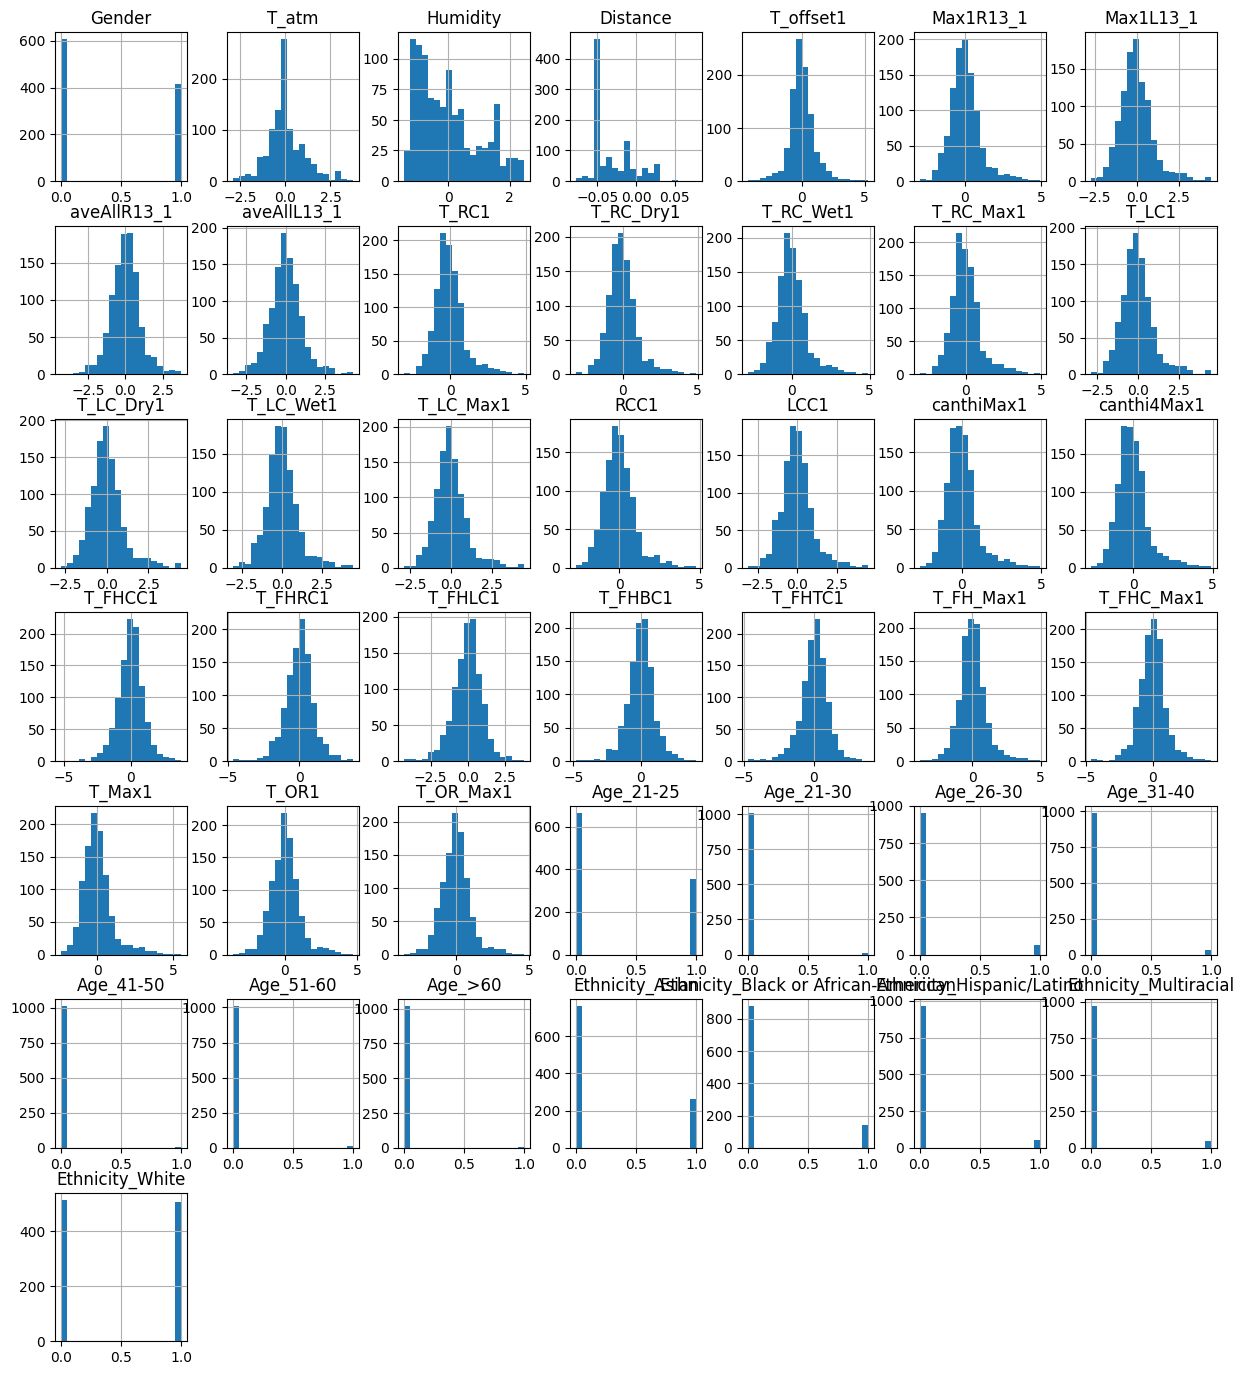

<Figure size 1500x1000 with 0 Axes>

In [17]:
# Histograms for numerical features
X_prepared.hist(bins=20, figsize=(15, 17))
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()  # Adjusts spacing to avoid overlap
plt.show()

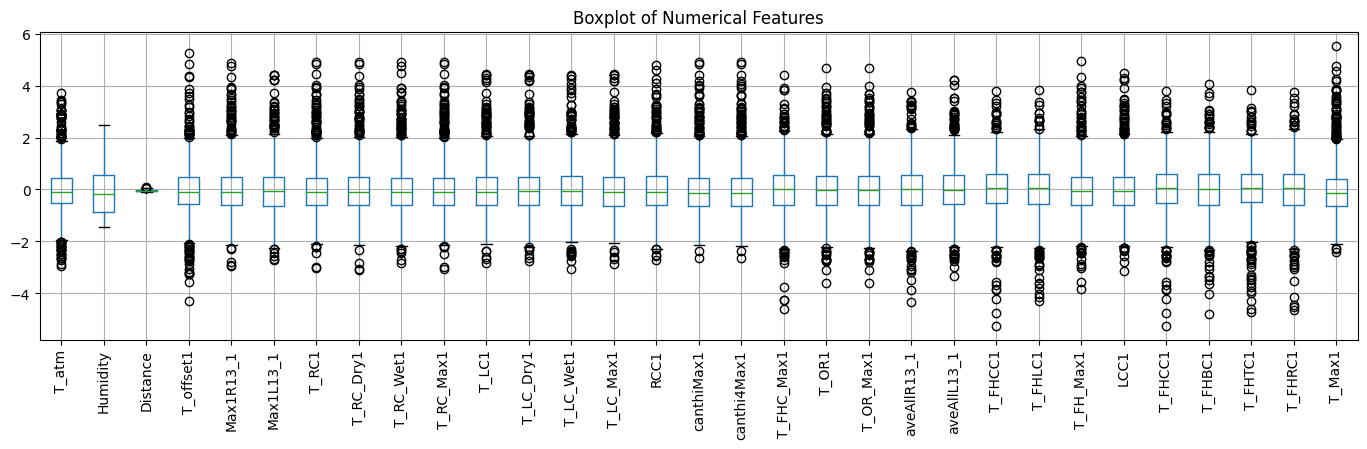

In [18]:
# Boxplot for numerical features
X_prepared[numerical_columns].boxplot(figsize=(17, 4))
plt.xticks(rotation=90)
plt.title('Boxplot of Numerical Features')
plt.show()

In [ ]:
#### Task 2: Implement the models

In [19]:
## 2.1. Implement analytical linear regression solution for Dataset 1.
class AnalyticalLinearRegression:
  def __init__(self, biased = True):
    """
    Initializes the LinearRegressionAnalytical model.

    Parameters:
    ----------
    add_bias : bool, optional (default=True)
        A flag indicating whether to add a bias (intercept) term to the feature matrix. If True,
        a column of ones will be added to the input features to account for the intercept.

    Attributes initialized:
    -----------------------
    biased : bool
        Whether to add a bias (intercept) term to the model.
    w : numpy array or None
        The weights of the model, initialized to None. These will be computed after fitting the model.
    """
    self.biased = biased
    self.w = None # Our weights for the linear regression

  def fit(self, X, y):
    """
    Fits the linear regression model using the analytical solution (normal equation).

    This method computes the optimal weights for the linear regression model by solving the normal
    equation: w = (X^T X)^(-1) X^T y. If the add_bias flag is set to True, a column of ones is added
    to the feature matrix X to include an intercept term in the model.

    Parameters:
    ----------
    X : numpy array of shape (n_samples, n_features)
        The input feature matrix where n_samples is the number of data points and n_features
        is the number of features.

    y : numpy array of shape (n_samples,)
        The target values corresponding to the input data.

    Returns:
    --------
    self : object
        Returns the instance of the fitted model.
    """
    if X.ndim == 1: # Treats one dimensional case into vector
      X = X[:, None]
    N = X.shape[0] # N = number of samples taken
    if self.biased:
      X = np.column_stack([np.ones(N), X]) # Adds bias column of 1s
    # analytical solution
    self.w = np.linalg.pinv(X.T@X) @ X.T @ y # we get the weights with the closed form matrix solution
    #self.w = np.linalg.lstsq(X, y)[0] # could alternatively by used as suggested by the collab
    return self

  def predict(self, X):
    """
    Predicts target values for a given set of input data using the trained model.

    This method uses the learned weights to make predictions. If the model was trained with a bias
    (intercept), a column of ones is added to the feature matrix X before making predictions.

    Parameters:
    ----------
    X : numpy array of shape (n_samples, n_features)
        The input feature matrix for which to make predictions.

    Returns:
    --------
    y_hat : numpy array of shape (n_samples,)
        The predicted target values for the input data.
    """
    if X.ndim == 1:
      X = X[:, None]
    if self.biased:
      N = X.shape[0]
      X = X = np.column_stack([np.ones(N), X])
    y_hat = X @ self.w
    return y_hat

In [20]:
## 2.2. Implement mini-batch stochastic gradient descent for both linear and logistic regression.
class MBSGDLinearRegression: # Mini-batch Stochastic Gradient Descent
  def __init__(self, biased = True, learning_rate = 0.01, max_iters = 10000, epsilon = 1e-8, batch_size = 32, verbose = False, record_history = False):
    """
        Initializes the Mini-batch SGD Linear Regression model with configurable options for
        bias term, learning rate, maximum iterations, batch size, and convergence threshold.

        Parameters:
        ----------
        biased : bool
            If True, includes a bias term (intercept) in the model.
        learning_rate : float
            The learning rate for gradient descent.
        max_iters : int
            Maximum number of iterations for the gradient descent.
        batch_size : int
            The size of mini-batches to use during training.
        epsilon : float
            Convergence threshold. Training stops when the gradient norm is smaller than epsilon.
        record_history : bool
            If True, stores weight history for visualization purposes.
        """
    self.biased = biased
    self.learning_rate = learning_rate
    self.max_iters = max_iters
    self.batch_size = batch_size
    self.verbose = verbose
    self.record_history = record_history
    self.epsilon = epsilon
    if record_history:
      self.weight_history = [] # Used to store wieghts for visualization purposes

  def gradient(self, X_batch, y_batch, w):
    """
        Compute the gradient of the linear regression cost function.

        Parameters:
        - X: The feature matrix.
        - y: The target vector.

        Returns:
        - The gradient of the cost function w.r.t. the weights (size D).
    """
    y_hat = X_batch @ w
    local_N, local_D = X_batch.shape
    grad = .5*np.dot(y_hat - y_batch, X_batch)/local_N # Computes the gradient of the cost function
    return grad

  def run(self, X, y, w):
    """
        Executes mini-batch stochastic gradient descent to minimize the cost function.

        Parameters:
        ----------
        gradient : function
            The function to compute the gradient of the cost function.
        X : numpy array
            The input feature matrix.
        y : numpy array
            The target values.
        w : numpy array
            Initial weights.

        Returns:
        --------
        w : numpy array
            Optimized weights after running mini-batch gradient descent.
        """
    N = X.shape[0]
    grad = np.inf # Initialize gradient as infinity for the loop
    t = 0 # Initialize iteration counter
    while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
      # Stochastic step to obtain mini-batch
      indices = np.random.choice(N, self.batch_size, replace = False)
      X_batch = X[indices]
      y_batch = y[indices]
      w = w - self.learning_rate * self.gradient(X_batch, y_batch, w) # walk down the gradient and update weight
      if self.record_history:
        self.weight_history.append(w.copy()) # update history

      t += 1

    if self.verbose:
      print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(grad)}')
      print(f'the weight found: {w}')
    return w

  def fit(self, X, y):
    """
        Fits the linear regression model using mini-batch stochastic gradient descent.

        Parameters:
        ----------
        X : numpy array
            The input feature matrix.
        y : numpy array
            The target values.

        Returns:
        --------
        self : object
            The instance of the fitted model.
        """
    if X.ndim == 1: # Treats one dimensional case into vector
      X = X[:, None]
    N = X.shape[0] # N = number of samples taken, D = dimension of data
    if self.biased:
      X = np.column_stack([np.ones(N), X]) # Addes bias 1s
    N,D = X.shape
    # gradient descent
    w0 = np.zeros(D) # inital weights
    self.w = self.run(X, y, w0)
    return self

  def predict(self, X):
    """
        Predicts the target values for the given input data.

        Parameters:
        ----------
        X : numpy array
            The input feature matrix.

        Returns:
        --------
        y_hat : numpy array
            The predicted target values.
        """
    if X.ndim == 1:
      X = X[:, None]
    if self.biased:
      N = X.shape[0]
      X = X = np.column_stack([np.ones(N), X])
    y_hat = X @ self.w
    return y_hat


In [ ]:
#### Task 3: Run experiments

In [21]:
## 1. Report the performance of linear regression. Use a 80−20 train/test split and report the performance on both training set and test set.
# Create a random number generator
random_seed_generator = np.random.default_rng()

# Generate a random seed, randomize dataset
seed = random_seed_generator.integers(0, 2**32 - 1)  # Generates a random integer seed
X_prepared_rand = X_prepared.copy()
X_prepared_rand = X_prepared_rand.sample(frac=1, random_state=seed).reset_index(drop=True)
Y_prepared_rand = y.copy()
Y_prepared_rand = Y_prepared_rand.sample(frac=1, random_state=seed).reset_index(drop=True)

def calculate_r_squared(y, yhat):
  # 1. Calculate the mean of actual values
  y_mean = np.mean(y)
  # 2. Calculate SS_res (Residual sum of squares)
  ss_res = np.sum((y - yhat) ** 2)
  # 3. Calculate SS_tot (Total sum of squares)
  ss_tot = np.sum((yhat - y_mean) ** 2)
  # 4. Calculate R-squared
  r_squared = 1 - (ss_res / ss_tot)

  return r_squared

def plot_performance(y, yhat, train_or_test, ana_or_stoch, percentage):
  # y_hat_training vs y_train
    plt.figure(figsize=(8, 6))
    # Scatter plot for predicted vs actual values
    plt.scatter(y, yhat, color='blue', alpha=0.5)
    # Set plot labels and title
    if train_or_test == 0:
      plt.xlabel('Actual Values: train_Y')
      plt.ylabel('Predicted Values: y_hat_training')

      if ana_or_stoch == 0:
        plt.title(f'Analytical Linear Regression Predicted Values vs Actual Values on Training Set with training:test split of: {percentage}')
      elif ana_or_stoch == 1:
        plt.title(f'Stochastic Linear Regression Predicted Values vs Actual Values on Training Set with training:test split of: {percentage}')


    elif train_or_test == 1:
      plt.xlabel('Actual Values: test_Y')
      plt.ylabel('Predicted Values: y_hat_test')

      if ana_or_stoch == 0:
        plt.title(f'Analytical Linear Regression Predicted Values vs Actual Values on Test Set with training:test split of: {percentage}')
      elif ana_or_stoch == 1:
        plt.title(f'Stochastic Linear Regression Predicted Values vs Actual Values on Test Set with training:test split of: {percentage}')

    plt.show()


def split_and_predict(percentage, model_num, to_print, rate_of_learning = 0.01):
  # Compute the index for the split
  split = int(percentage * len(X_prepared_rand))

  # Split the DataFrame
  train_X = X_prepared_rand[:split]
  test_X = X_prepared_rand[split:]
  train_Y = Y_prepared_rand[:split]
  test_Y = Y_prepared_rand[split:]
  # Convert to numpy arrays
  np_train_X = train_X.to_numpy(dtype='float')
  np_test_X = test_X.to_numpy(dtype='float')
  np_train_Y = train_Y.to_numpy(dtype='float')
  np_test_Y = test_Y.to_numpy(dtype='float')

  if (model_num == 1):
    ## Analytical Linear Regression
    model = AnalyticalLinearRegression()
    weights = model.fit(np_train_X,np_train_Y)
    y_hat = model.predict(np_train_X)
    y_hat_test = model.predict(np_test_X)

    r_squared1 = calculate_r_squared(np_train_Y, y_hat)
    r_squared2 = calculate_r_squared(np_test_Y, y_hat_test)

    if to_print:
      plot_performance(train_Y, y_hat, 0, 0, percentage)
      plot_performance(test_Y, y_hat_test, 1, 0, percentage)

      print("------------------------------------")
      print("r^2 value of training set using Analytical Linear Regression with training:test split of ", percentage, ": ", r_squared1)
      print("r^2 value of test set using Analytical Linear Regression with training:test split of ", percentage, ": ", r_squared2)
      print("------------------------------------")


  elif (model_num == 2):
    model = MBSGDLinearRegression(learning_rate = rate_of_learning)
    weights = model.fit(np_train_X,np_train_Y)
    y_hat = model.predict(np_train_X)
    y_hat_test = model.predict(np_test_X)

    r_squared1 = calculate_r_squared(np_train_Y, y_hat)
    r_squared2 = calculate_r_squared(np_test_Y, y_hat_test)

    if to_print:
      plot_performance(train_Y, y_hat, 0, 1, percentage)
      plot_performance(test_Y, y_hat_test, 1, 1, percentage)

      print("------------------------------------")
      print("r^2 value of training set using Stochastic Linear Regression with training:test split of ", percentage, ": ", r_squared1)
      print("r^2 value of test set using Stochastic Linear Regression with training:test split of ", percentage, ": ", r_squared2)
      print("------------------------------------")

  else:
    return -1

  return [r_squared1, r_squared2, weights.w]



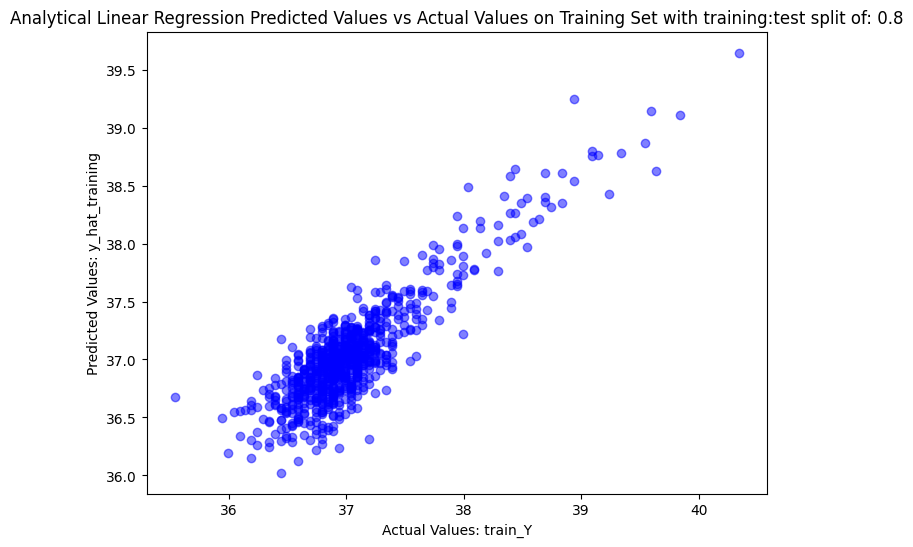

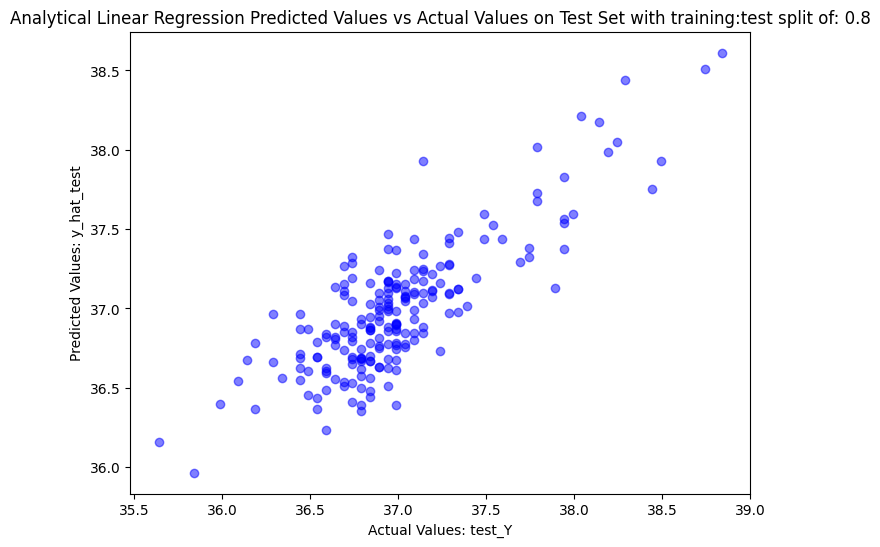

------------------------------------
r^2 value of training set using Analytical Linear Regression with training:test split of  0.8 :  0.712164282845926
r^2 value of test set using Analytical Linear Regression with training:test split of  0.8 :  0.5860625094635377
------------------------------------


In [ ]:
## Analytical Linear Regression
weights_analytical = split_and_predict(0.8, 1, True)[2]

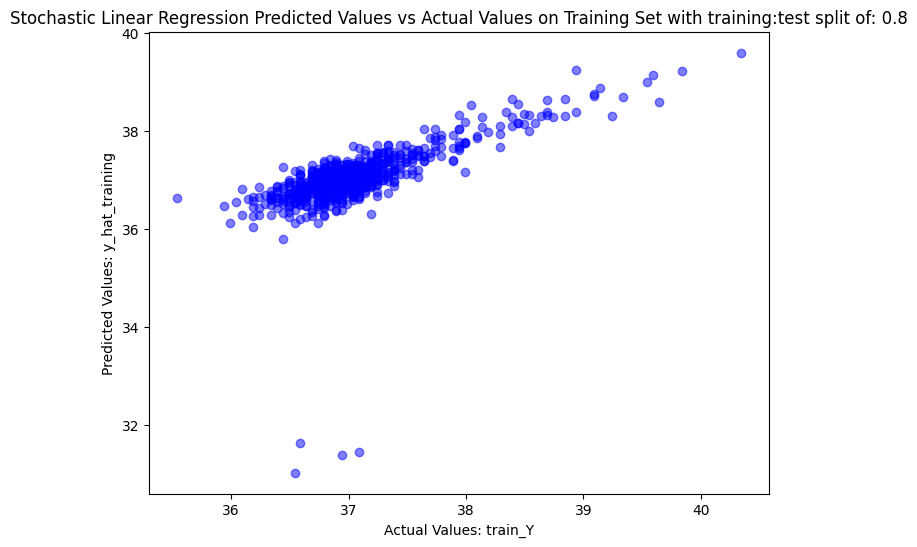

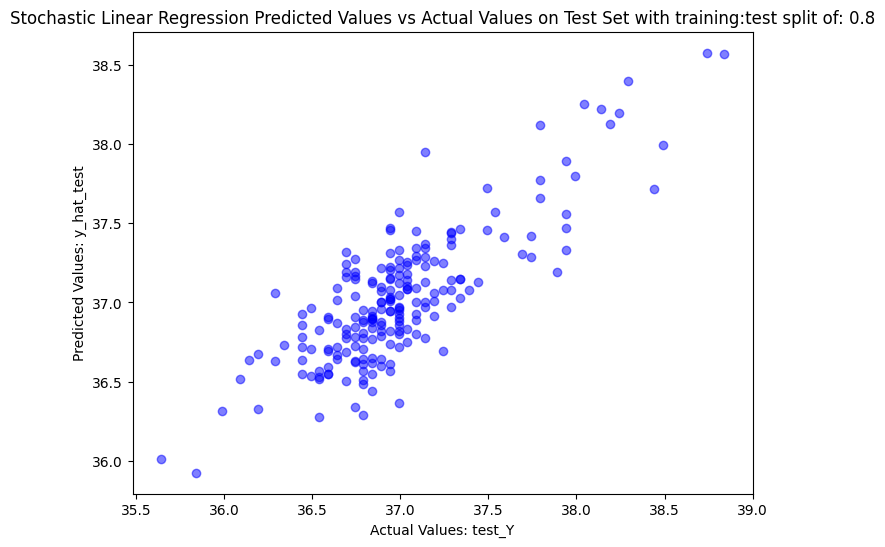

------------------------------------
r^2 value of training set using Stochastic Linear Regression with training:test split of  0.8 :  0.417522965175281
r^2 value of test set using Stochastic Linear Regression with training:test split of  0.8 :  0.5905223502243111
------------------------------------


In [ ]:
## Stochastic Linear Regression
weights_stochastic = split_and_predict(0.8, 2, True, 0.025)[2]

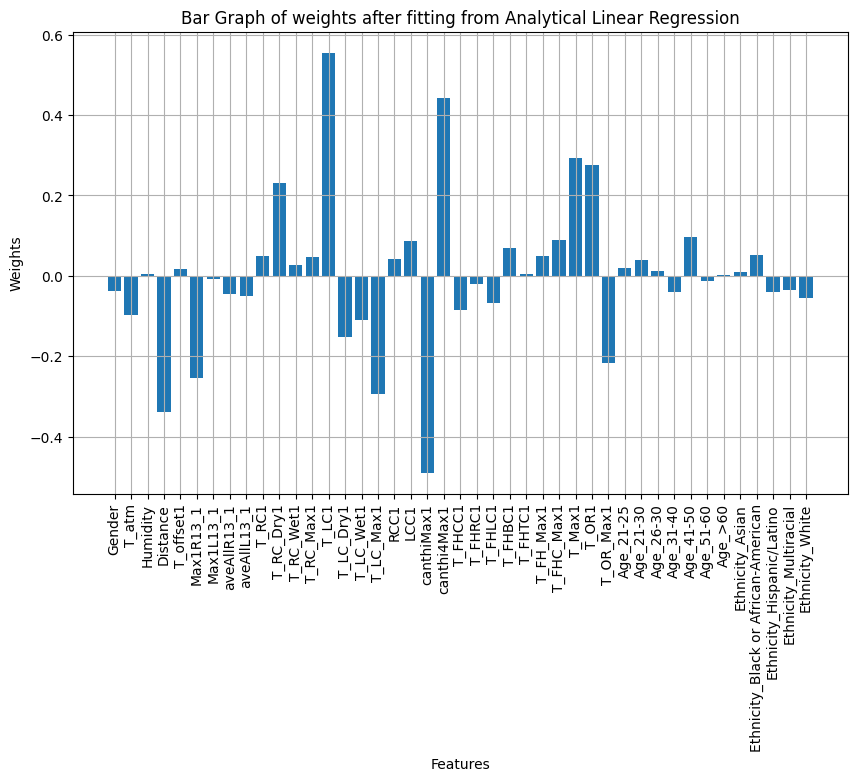

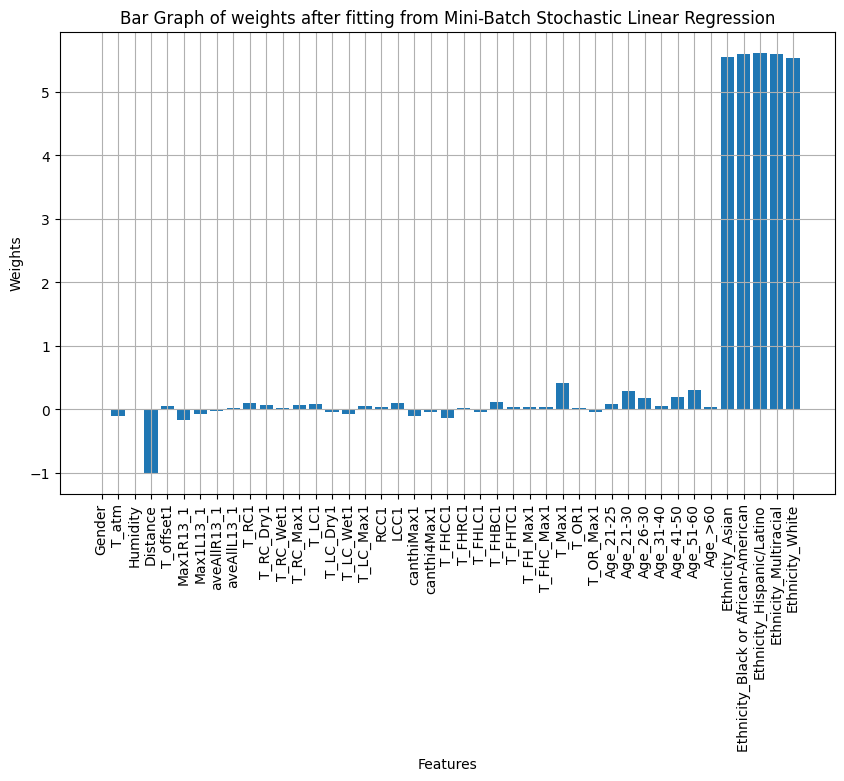

In [ ]:
## 2. Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.

# Print weights
column_titles = X_prepared.columns

# Define the x-axis labels (if needed)

def weight_graph(weights, ana_or_stoch):
  # Create the bar graph
  plt.figure(figsize=(10, 6))
  plt.bar(column_titles, weights[1:])

  # Adding labels and title
  plt.xlabel('Features')
  plt.xticks(rotation=90)
  plt.ylabel('Weights')
  if ana_or_stoch:
    plt.title('Bar Graph of weights after fitting from Mini-Batch Stochastic Linear Regression')

  else:
    plt.title('Bar Graph of weights after fitting from Analytical Linear Regression')

  plt.grid()

  # Show the plot
  plt.show()

weight_graph(weights_analytical, 0)
weight_graph(weights_stochastic, 1)

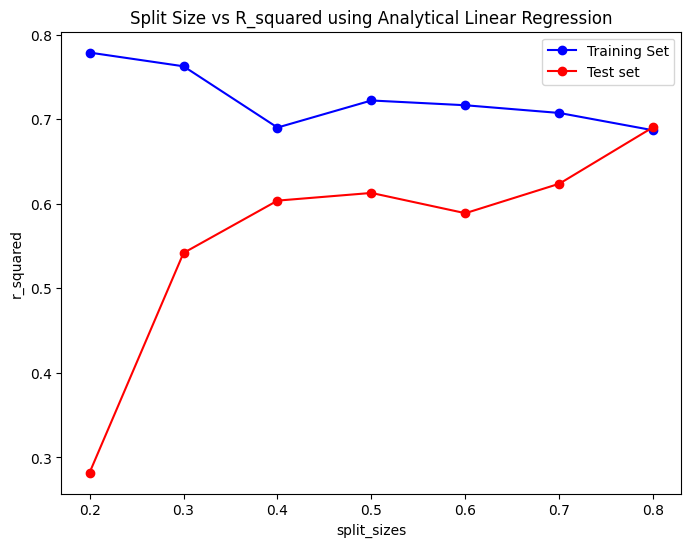

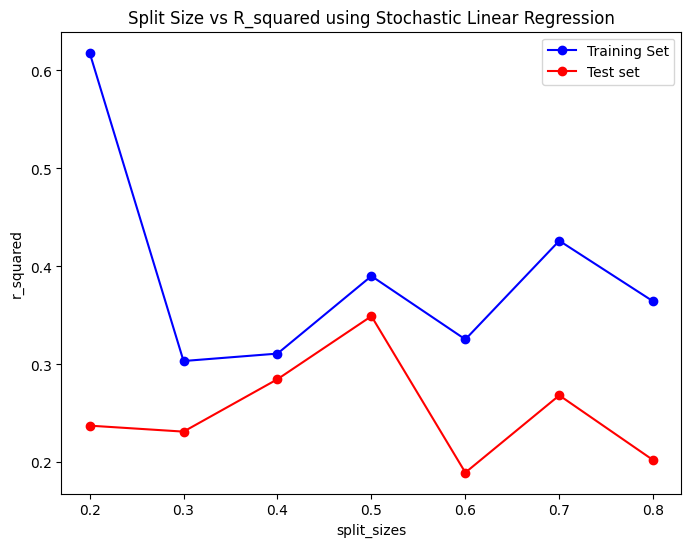

In [22]:
## 3. Sample growing subsets of the training data (20%,30%,...80%). Observe and explain how does size of training data affects the performance for both models. Plot two curves as a function of training size, one for performance in train and one for test.
analytical_data = []
stochastic_data = []
split_sizes = []

for i in range(2, 9, 1):
  temp = i / 10
  analytical_data.append(split_and_predict(temp, 1, False))
  stochastic_data.append(split_and_predict(temp, 2, False))
  split_sizes.append(i / 10)

def plot_split_accuracy(r_squared_values, ana_or_stoch):
  plt.figure(figsize=(8, 6))
  column0 = [row[0] for row in r_squared_values]
  column1 = [row[1] for row in r_squared_values]

  # Plotting the Graph
  plt.plot(split_sizes, column0, label="Training Set", color="blue", marker='o')
  plt.plot(split_sizes, column1, label="Test set", color="red", marker='o')

  # Set plot labels and title
  plt.xlabel('split_sizes')
  plt.ylabel('r_squared')
  if ana_or_stoch == 0:
    plt.title('Split Size vs R_squared using Analytical Linear Regression')
  elif ana_or_stoch == 1:
    plt.title('Split Size vs R_squared using Stochastic Linear Regression')

  plt.legend()
  plt.show

plot_split_accuracy(analytical_data, 0)
plot_split_accuracy(stochastic_data, 1)




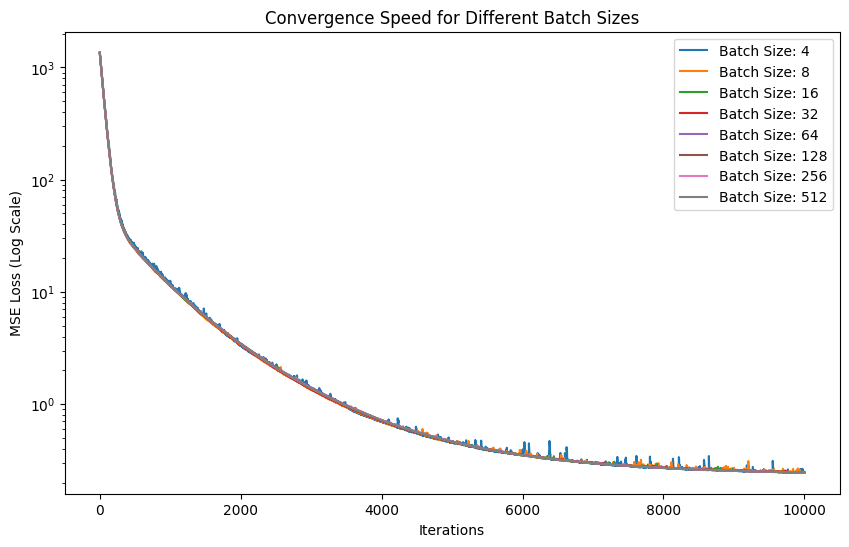

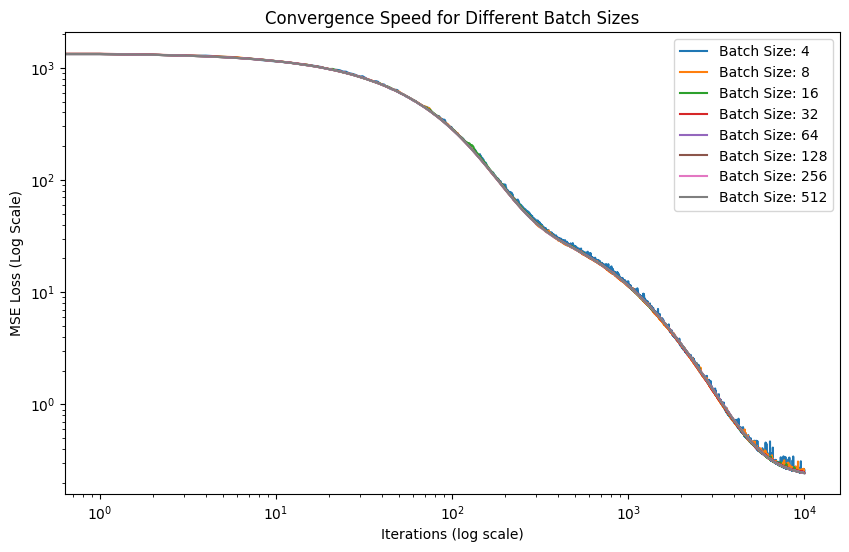

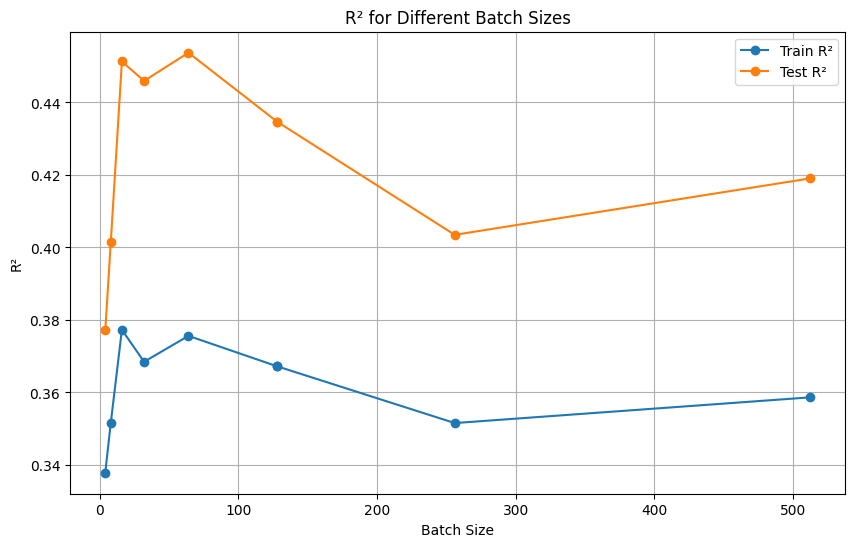

In [ ]:
## 4. For both linear regression, try out growing minibatch sizes, e.g., 8, 16, 32, 64, and 128. Compare the convergence speed and final performance of different batch sizes to the fully batched baseline. Which configuration works the best among the ones you tried?
# Create a random number generator
random_seed_generator = np.random.default_rng()

# Generate a random seed
seed = random_seed_generator.integers(0, 2**32 - 1)  # Generates a random integer seed

# Copy the original datasets before shuffling
X_prep_stoc = X_prepared.copy()
Y_prep_stoc = y.copy()

# Shuffle the dataset using the generated seed
X_prepared_stoc = X_prep_stoc.sample(frac=1, random_state=seed).reset_index(drop=True)
Y_prepared_stoc = Y_prep_stoc.sample(frac=1, random_state=seed).reset_index(drop=True)

# Compute the index for the split (80% for training, 20% for testing)
split = int(0.8 * len(X_prepared_stoc))

# Split the DataFrame into training and testing sets
train_X_stoch = X_prepared_stoc[:split]
test_X_stoch = X_prepared_stoc[split:]
train_Y_stoch = Y_prepared_stoc[:split]
test_Y_stoch = Y_prepared_stoc[split:]

# Convert to NumPy arrays
np_stoch_train_X = train_X_stoch.to_numpy(dtype='float')
np_stoch_test_X = test_X_stoch.to_numpy(dtype='float')
np_stoch_train_Y = train_Y_stoch.to_numpy(dtype='float')
np_stoch_test_Y = test_Y_stoch.to_numpy(dtype='float')

batch_sizes = [4, 8, 16, 32, 64, 128, 128, 256, 512]
convergence_info = {}

# relevant for calculating the loss to fix the bias column
X_with_bias = np.column_stack([np.ones(np_stoch_train_X.shape[0]), np_stoch_train_X])


for batch_size in batch_sizes:
  model = MBSGDLinearRegression(batch_size = batch_size, record_history = True, max_iters = 10000)
  model.fit(np_stoch_train_X, np_stoch_train_Y)
  history = []
  for weights in model.weight_history:
    loss = calculate_loss(X_with_bias, np_stoch_train_Y, weights)
    history.append(loss)

  y_train_pred_stoch = model.predict(np_stoch_train_X)
  y_test_pred_stoch = model.predict(np_stoch_test_X)

  r2_train = calculate_r_squared(np_stoch_train_Y, y_train_pred_stoch)
  r2_test = calculate_r_squared(np_stoch_test_Y, y_test_pred_stoch)

  convergence_info[batch_size] = {
    'r2_train': r2_train,
    'r2_test': r2_test,
    'history': history  # Store the loss per epoch for convergence analysis
  }
# plotting convergence
plt.figure(figsize=(10, 6))
for batch_size, info in convergence_info.items():
  plt.plot(info['history'], label=f'Batch Size: {batch_size}')
plt.title('Convergence Speed for Different Batch Sizes')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss (Log Scale)')
plt.yscale('log')  # Set y-axis to log scale
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for batch_size, info in convergence_info.items():
  plt.plot(info['history'], label=f'Batch Size: {batch_size}')
plt.title('Convergence Speed for Different Batch Sizes')
plt.xlabel('Iterations (log scale)')
plt.xscale('log')
plt.ylabel('MSE Loss (Log Scale)')
plt.yscale('log')  # Set y-axis to log scale
plt.legend()
plt.show()

# Plotting the R² values for different batch sizes
plt.figure(figsize=(10, 6))
r2_train_values = [convergence_info[batch_size]['r2_train'] for batch_size in batch_sizes]
r2_test_values = [convergence_info[batch_size]['r2_test'] for batch_size in batch_sizes]

plt.plot(batch_sizes, r2_train_values, label='Train R²', marker='o')
plt.plot(batch_sizes, r2_test_values, label='Test R²', marker='o')
plt.title('R² for Different Batch Sizes')
plt.xlabel('Batch Size')
plt.ylabel('R²')
plt.legend()
plt.grid(True)
plt.show()

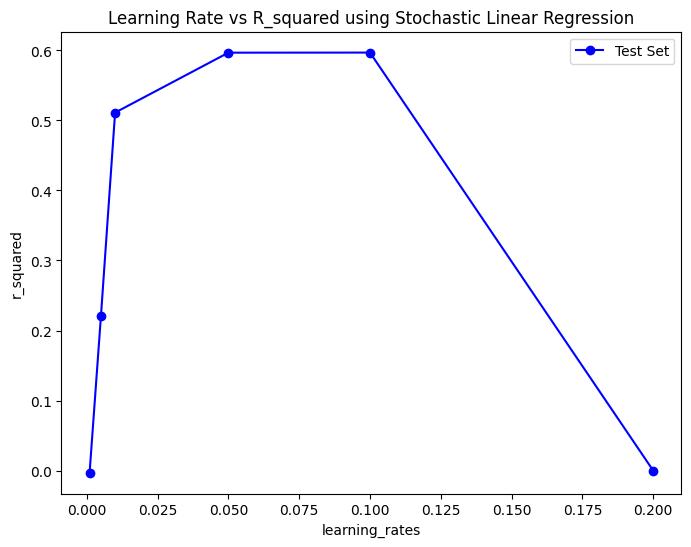

In [ ]:
## 5. Present the performance of both linear and logistic regression with at least three different learning rates (your own choice).

learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
r_squared = []

for learning_rate_value in learning_rates:
  r_squared.append(split_and_predict(temp, 2, False, learning_rate_value)[1])

plt.figure(figsize=(8, 6))
# Plotting the Graph
plt.plot(learning_rates, r_squared, label="Test Set", color="blue", marker='o')

# Set plot labels and title
plt.xlabel('learning_rates')
plt.ylabel('r_squared')

plt.title('Learning Rate vs R_squared using Stochastic Linear Regression')

plt.legend()

In [ ]:
def hyperparameter_search(X, y, split_range = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], learning_range = [0.001, 0.01, 0.5, 0.1, 0.2, 0.5], batch_range = [8, 16, 32, 64, 128]):
  best_score = -float('inf')
  best_stats = None
  runner_up = None
  for sp in split_range:
    split = int(sp * len(X_prepared_stoc))
    train_X = X[:split]
    test_X = X[split:]
    train_Y = y[:split]
    test_Y = y[split:]
    X_train = train_X.to_numpy(dtype='float')
    X_test = test_X.to_numpy(dtype='float')
    Y_train = train_Y.to_numpy(dtype='float')
    Y_test = test_Y.to_numpy(dtype='float')
    for lr in learning_range:
      for bac in batch_range:
        model = MBSGDLinearRegression(learning_rate=lr, batch_size=bac)
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)
        score = calculate_r_squared(Y_test, y_pred)
        if (score > best_score):
          best_score = score
          runner_up = best_stats
          best_stats = {'train test split' : sp, 'batch size' : bac, 'learning rate' : lr, 'r^2' : score}
  return best_stats, runner_up

# Generate a random seed
  # Generates a random integer seed
random_seed_generator = np.random.default_rng()
seed = random_seed_generator.integers(0, 2**32 - 1)

# Copy the original datasets before shuffling
X_prep = X_prepared.copy()
Y_prep = y.copy()

# Shuffle the dataset using the generated seed
X_preped = X_prep.sample(frac=1, random_state=seed).reset_index(drop=True)
Y_preped = y.sample(frac=1, random_state=seed).reset_index(drop=True)

first_place, second_place = hyperparameter_search(X = X_preped, y = Y_preped)
print("Best parameters and score:", first_place)
print("Second best parameters and score:", second_place)
# First search:
# Best parameters and score: {'train test split': 0.7, 'batch size': 32, 'learning rate': 0.1, 'r^2': 0.743422323939297}
# Second best parameters and score: {'train test split': 0.6, 'batch size': 8, 'learning rate': 0.1, 'r^2': 0.7216842402325313}



<ipython-input-97-9be70075cc6d>:44: RuntimeWarning: invalid value encountered in matmul
  y_hat = X_batch @ w
<ipython-input-97-9be70075cc6d>:44: RuntimeWarning: overflow encountered in matmul
  y_hat = X_batch @ w
<ipython-input-97-9be70075cc6d>:77: RuntimeWarning: invalid value encountered in subtract
  w = w - self.learning_rate * self.gradient(X_batch, y_batch, w) # walk down the gradient and update weight


Best parameters and score: {'train test split': 0.8, 'batch size': 16, 'learning rate': 0.1, 'r^2': 0.6057331428681135}
Second best parameters and score: {'train test split': 0.7, 'batch size': 32, 'learning rate': 0.1, 'r^2': 0.5337876017665921}


In [ ]:
class MBSGDLinearRegressionMomentum: # Mini-batch Stochastic Gradient Descent
  """
  New mini batch stochastic desecent class with momentum implementation
  """
  def __init__(self, biased = True, learning_rate = 0.01, max_iters = 10000, epsilon = 1e-8, batch_size = 32, momentum = 0.9, verbose = False, record_history = False):
    self.biased = biased
    self.learning_rate = learning_rate
    self.max_iters = max_iters
    self.batch_size = batch_size
    self.verbose = verbose
    self.record_history = record_history
    self.epsilon = epsilon
    self.momentum = momentum
    self.velocity = None  # This will hold the velocity (momentum)
    if record_history:
      self.weight_history = [] # Used to store wieghts for visualization purposes

  def gradient(self, X_batch, y_batch, w):
    y_hat = X_batch @ w
    local_N, local_D = X_batch.shape
    grad = .5*np.dot(y_hat - y_batch, X_batch)/local_N # Computes the gradient of the cost function
    return grad

  def run(self, X, y, w):
    N = X.shape[0]
    grad = np.inf # Initialize gradient as infinity for the loop
    t = 0 # Initialize iteration counter
    velocity = np.zeros_like(w)
    while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
      # Stochastic step to obtain mini-batch
      indices = np.random.choice(N, self.batch_size, replace = False)
      X_batch = X[indices]
      y_batch = y[indices]
      grad = self.gradient(X_batch, y_batch, w)
      velocity = self.momentum * velocity + self.learning_rate * grad
      w = w - velocity  # walk down the gradient and update weight
      if self.record_history:
        self.weight_history.append(w.copy()) # update history

      t += 1

    if self.verbose:
      print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(grad)}')
      print(f'the weight found: {w}')
    return w

  def fit(self, X, y):
    if X.ndim == 1: # Treats one dimensional case into vector
      X = X[:, None]
    N = X.shape[0] # N = number of samples taken, D = dimension of data
    if self.biased:
      X = np.column_stack([np.ones(N), X]) # Addes bias 1s
    N,D = X.shape
    # gradient descent
    w0 = np.zeros(D) # inital weights
    self.w = self.run(X, y, w0)
    return self

  def predict(self, X):
    if X.ndim == 1:
      X = X[:, None]
    if self.biased:
      N = X.shape[0]
      X = X = np.column_stack([np.ones(N), X])
    y_hat = X @ self.w
    return y_hat


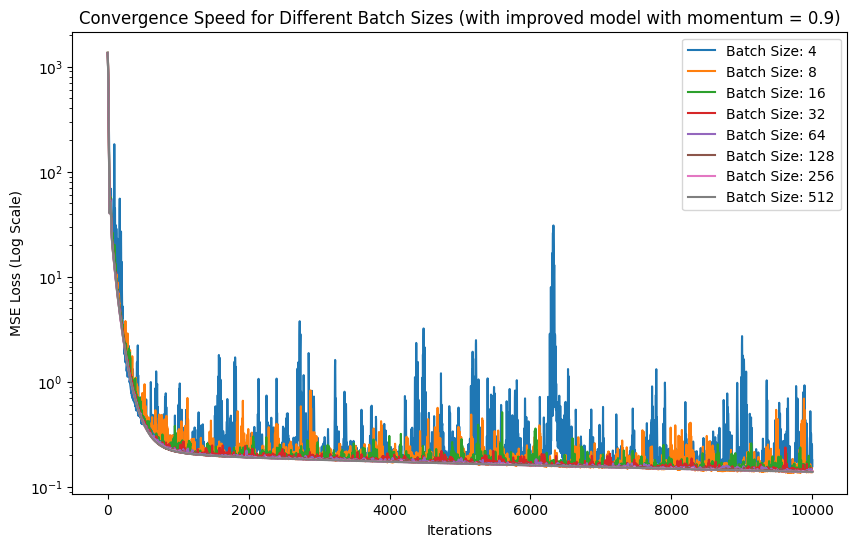

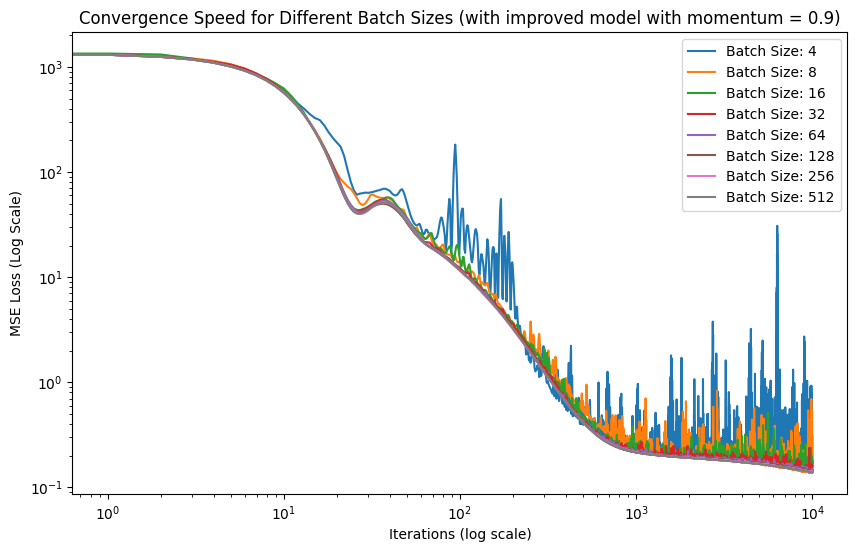

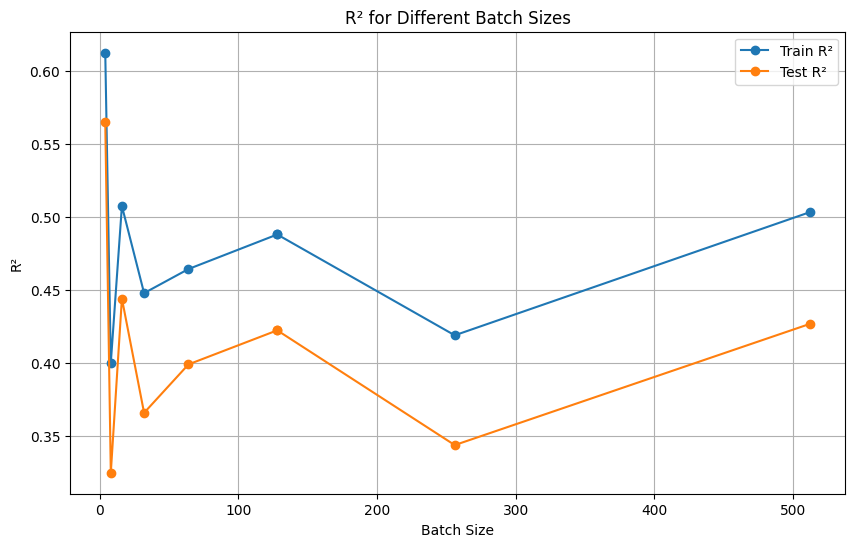

In [ ]:
# Mini batch stochastic gradient descent with momentum to reduce volitility
# Create a random number generator
random_seed_generator = np.random.default_rng()

# Generate a random seed
seed = random_seed_generator.integers(0, 2**32 - 1)  # Generates a random integer seed

# Copy the original datasets before shuffling
X_prep_stoc = X_prepared.copy()
Y_prep_stoc = y.copy()

# Shuffle the dataset using the generated seed
X_prepared_stoc = X_prep_stoc.sample(frac=1, random_state=seed).reset_index(drop=True)
Y_prepared_stoc = Y_prep_stoc.sample(frac=1, random_state=seed).reset_index(drop=True)

# Compute the index for the split (80% for training, 20% for testing)
split = int(0.8 * len(X_prepared_stoc))

# Split the DataFrame into training and testing sets
train_X_stoch = X_prepared_stoc[:split]
test_X_stoch = X_prepared_stoc[split:]
train_Y_stoch = Y_prepared_stoc[:split]
test_Y_stoch = Y_prepared_stoc[split:]

# Convert to NumPy arrays
np_stoch_train_X = train_X_stoch.to_numpy(dtype='float')
np_stoch_test_X = test_X_stoch.to_numpy(dtype='float')
np_stoch_train_Y = train_Y_stoch.to_numpy(dtype='float')
np_stoch_test_Y = test_Y_stoch.to_numpy(dtype='float')

batch_sizes = [4, 8, 16, 32, 64, 128, 128, 256, 512]
convergence_info = {}

# relevant for calculating the loss to fix the bias column
X_with_bias = np.column_stack([np.ones(np_stoch_train_X.shape[0]), np_stoch_train_X])


for batch_size in batch_sizes:
  model = MBSGDLinearRegressionMomentum(batch_size = batch_size, record_history = True, max_iters = 10000)
  model.fit(np_stoch_train_X, np_stoch_train_Y)
  history = []
  for weights in model.weight_history:
    loss = calculate_loss(X_with_bias, np_stoch_train_Y, weights)
    history.append(loss)

  y_train_pred_stoch = model.predict(np_stoch_train_X)
  y_test_pred_stoch = model.predict(np_stoch_test_X)

  r2_train = calculate_r_squared(np_stoch_train_Y, y_train_pred_stoch)
  r2_test = calculate_r_squared(np_stoch_test_Y, y_test_pred_stoch)

  convergence_info[batch_size] = {
    'r2_train': r2_train,
    'r2_test': r2_test,
    'history': history  # Store the loss per epoch for convergence analysis
  }
# plotting convergence
plt.figure(figsize=(10, 6))
for batch_size, info in convergence_info.items():
  plt.plot(info['history'], label=f'Batch Size: {batch_size}')
plt.title('Convergence Speed for Different Batch Sizes (with improved model with momentum = 0.9)')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss (Log Scale)')
plt.yscale('log')  # Set y-axis to log scale
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for batch_size, info in convergence_info.items():
  plt.plot(info['history'], label=f'Batch Size: {batch_size}')
plt.title('Convergence Speed for Different Batch Sizes (with improved model with momentum = 0.9)')
plt.xlabel('Iterations (log scale)')
plt.xscale('log')
plt.ylabel('MSE Loss (Log Scale)')
plt.yscale('log')  # Set y-axis to log scale
plt.legend()
plt.show()

# Plotting the R² values for different batch sizes
plt.figure(figsize=(10, 6))
r2_train_values = [convergence_info[batch_size]['r2_train'] for batch_size in batch_sizes]
r2_test_values = [convergence_info[batch_size]['r2_test'] for batch_size in batch_sizes]

plt.plot(batch_sizes, r2_train_values, label='Train R²', marker='o')
plt.plot(batch_sizes, r2_test_values, label='Test R²', marker='o')
plt.title('R² for Different Batch Sizes')
plt.xlabel('Batch Size')
plt.ylabel('R²')
plt.legend()
plt.grid(True)
plt.show()